# PDS2: Endterm exam

### Date: June 4

### Time: 14:00 - 16:00


**Instructions:** 
* All answers should be filled in the notebook and then submitted to Moodle;
* For theoretical question you can use markdown and LaTeX;
* Save number of cells used for compilation;
* In order to get max scores, please write explanations and comments for each step. In addition, try to comment your code pieces.
* **Plagiarism will result in FAIL. For example, two students having identical code for solution, then both will get 0 mark for the exam.**


GOOD LUCK!

## Task 1 (50%)
Create regression model, which predicts the price of the house. Provide following steps:
1. Check basic info on the data set
2. Perform EDA: visualization on the data set (paiplots, histograms, correlation matrix)
3. Select all numerical features as X and price as y, then split data into train and test with test size = 0.3 and random_state = 2021
4. Do not apply scaling on your data for Linear Regression model, but you should apply it before using Ridge and Lasso


5. Fit  Linear Regression model, and find corresponding $R^2$ and MSE on train and test datasets
6. Fit  Ridge model with optimal alpha, and find corresponding $R^2$ and MSE on train and test datasets
7. Fit  Lasso model with optimal alpha, and find corresponding $R^2$ and MSE on train and test datasets


8. Store all results within one table (ex. df_results): column 1 (or index) - model, column 2 - $R^2$, column 3 - MSE
9. Store all coefficients within one table (ex. df_coefs): column 1 (or index) - variable name, column 2 - Linear Reg, column 3 - Ridge, column 4 - Lasso
10. Compare results. Explain why one model performs better than another/others.
11. Compare coefficients. Why there is a difference?
12. In case of Lasso, if there are any variables whose coefficients are shrinked down to **0**, it works as feature selection. What other approaches you would use to select features? 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models Needed
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge, Lasso , RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

# ML- model Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score ,roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
# Dropping unneeded column:
df = df.drop(['Address'], axis=1)

## 1.2. EDA

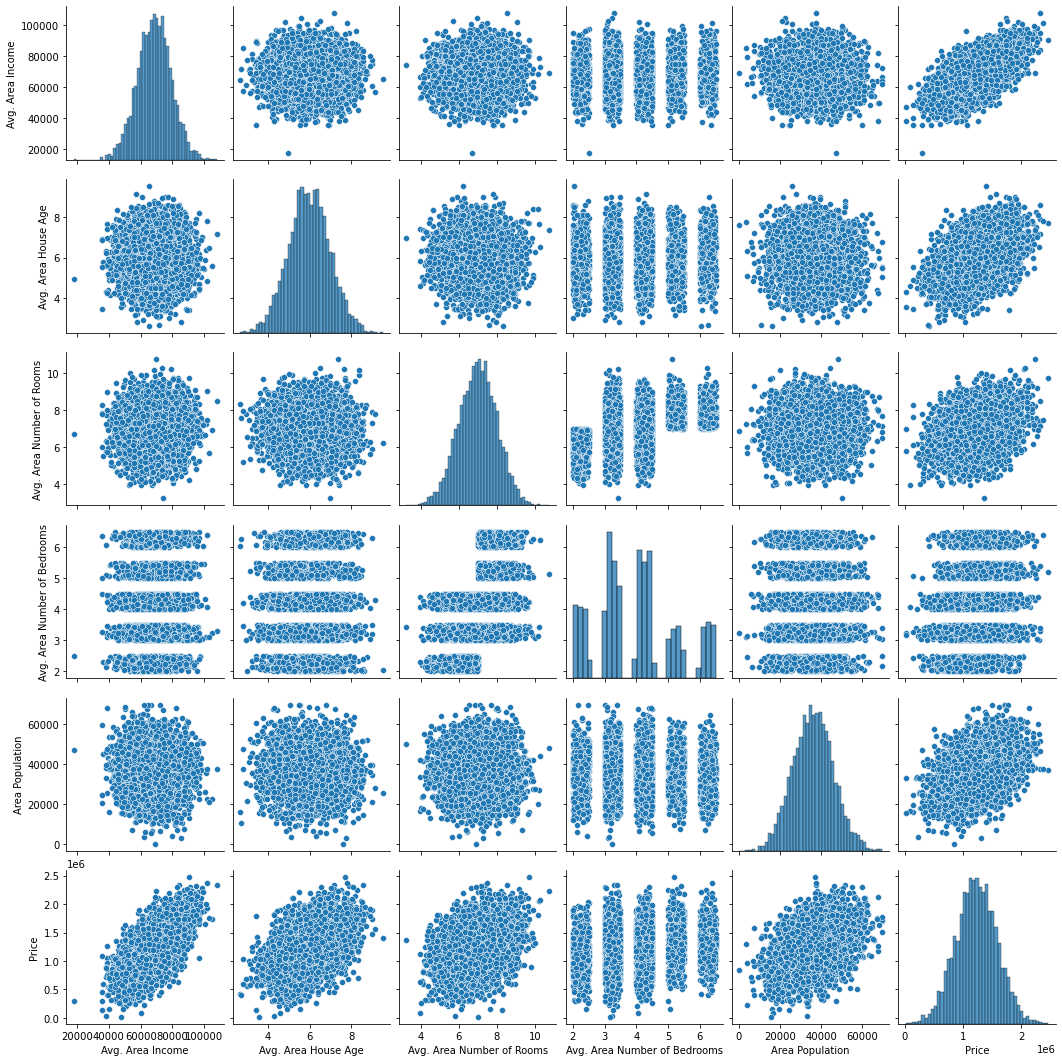

In [ ]:
# 1. PAIRPLOT OF THE DATASET:
sns.pairplot(df)

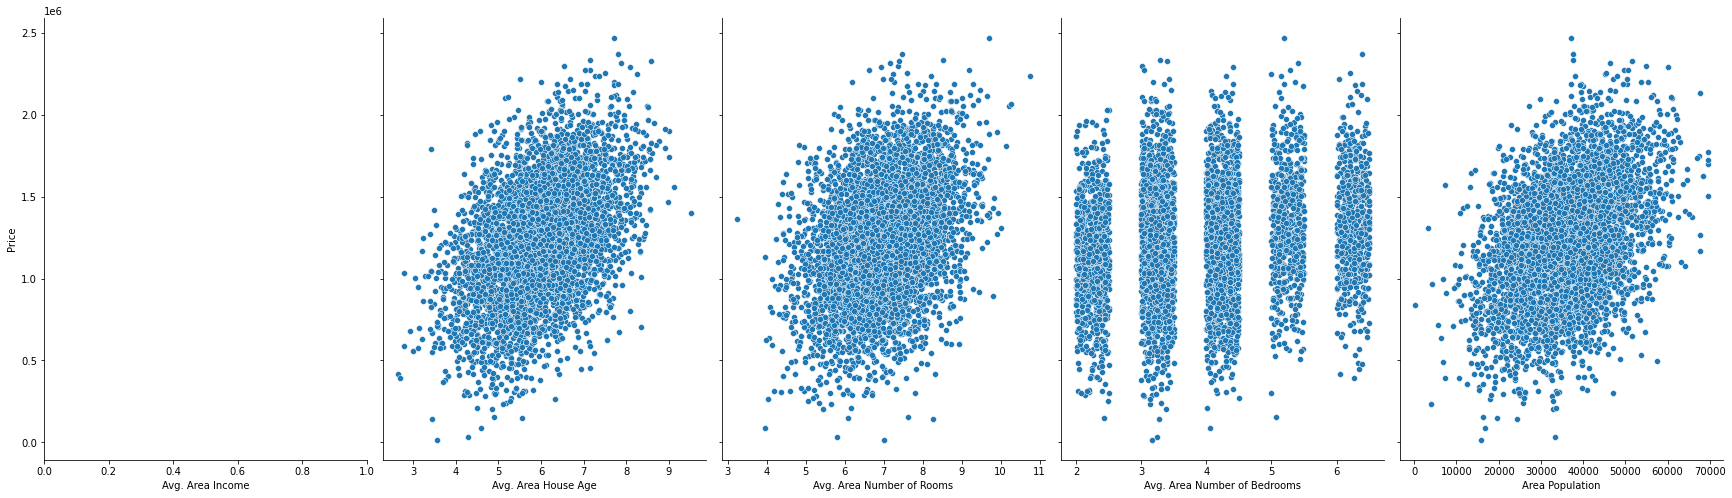

In [ ]:
# Before were too many plots,
# SO, here, is MAIN cols
sns.pairplot(df, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=7, aspect=0.7, kind='scatter')

Text(0.5, 1.0, 'Histogram of Price range')

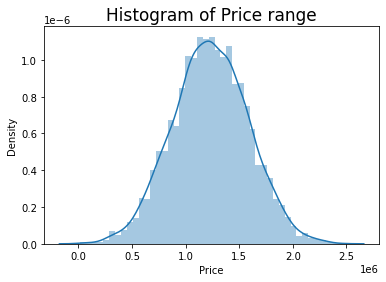

In [ ]:
# Here, Histogram type is displot, which shows the range of prices:
sns.distplot(df['Price'])
plt.title('Histogram of Price range',fontsize=17)

Text(0.5, 1.0, 'Heatmap for Correlation Matrix')

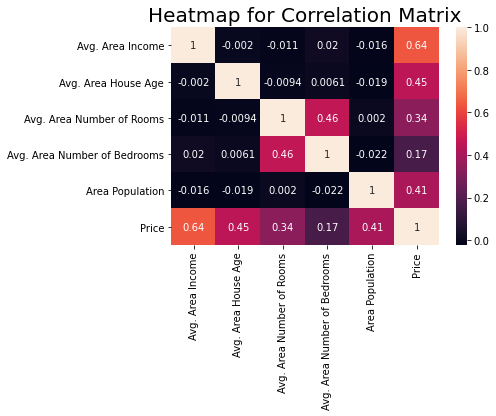

In [ ]:
# PLOTTIG CORRELATION MATRIX by using heatmap:
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap for Correlation Matrix',fontsize=20)

## 1.3. Train-test SPLIT

In [ ]:
# X and y arrays:
X = df.drop("Price", axis = 1) # All columns except this column.
y = df["Price"] # Only this column

# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021) 
# 70% training and 30% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 5)
(3500,)
(1500, 5)
(1500,)


## 1.4,5. Linear Regression model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluating on Train set
lin_r2_tr = round(r2_score(y_train,lin_reg.predict(X_train)),3)
lin_mse_tr = round(mean_squared_error(y_train,lin_reg.predict(X_train)),3)

print('R2_score on Train set>',lin_r2_tr)
print('MSE on Train set>',lin_mse_tr)


# Evaluating on Test set
lin_r2_ts = round(r2_score(y_test,lin_reg.predict(X_test)),3)
lin_mse_ts = round(mean_squared_error(y_test, lin_reg.predict(X_test)),3)

print('R2_score on Test set> ',lin_r2_ts)
print('MSE on Test set> ',lin_mse_ts)

print('Coefficients:> ',lin_reg.coef_)

R2_score on Train set> 0.922
MSE on Train set> 10114774293.28
R2_score on Test set>  0.907
MSE on Test set>  10489994930.237
Coefficients:>  [2.16733386e+01 1.64714427e+05 1.19739465e+05 1.04035389e+03
 1.52070631e+01]


## 1.6.  Ridge CV model

In [ ]:
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
# Next is RidgeCV Model:
# finding optimal alpha:
ridgecv = RidgeCV(alphas=[ 1000000, 1000, 100, 10 ,5, 1, 0.1, 0.001, 0.0001], scoring='neg_mean_squared_error',normalize = True)
ridgecv.fit(X_train, y_train)

ridgecv_mse_tr = mean_squared_error(y_train, ridgecv.predict(X_train))
ridgecv_r2_tr = r2_score(y_train, ridgecv.predict(X_train))
print('MSE on Train set>',ridgecv_mse_tr)
print('R^2 on Train set>',ridgecv_r2_tr)
# evaluating on test:
ridgecv_mse = mean_squared_error(y_test, ridgecv.predict(X_test))
ridgecv_r2 = r2_score(y_test, ridgecv.predict(X_test))
print('MSE on test set>',ridgecv_mse)
print('R^2 on test set>',ridgecv_r2)

alpha_rcv = ridgecv.alpha_
coef_ridge = ridgecv.coef_
print("Best model RidgeCV:\nalpha = {} \ncoefs = {}, ".format(alpha_rcv,coef_ridge ))

MSE on Train set> 10114775522.559116
R^2 on Train set> 0.9218831640329261
MSE on test set> 4.725734295805835e+20
R^2 on test set> -4167855260.085268
Best model RidgeCV:
alpha = 0.0001 
coefs = [233789.74041751 162817.28074056 121551.36314188   1304.05904989
 151646.56896356], 


## 1.7.  Lasso CV model

In [ ]:
# Next is LassoCV Model:
alphas = 10**np.linspace(10,-2,500)*0.5

lasso_cv = LassoCV(alphas=alphas, normalize = True)
lasso_cv.fit(X_train, y_train)

lasso_cv_mse_tr = mean_squared_error(y_train, lasso_cv.predict(X_train))
lasso_cv_r2_tr = r2_score(y_train, lasso_cv.predict(X_train))
print('MSE on Train set>',lasso_cv_mse_tr)
print('R^2 on Train set>',lasso_cv_r2_tr)

lasso_cv_mse = mean_squared_error(y_test, lasso_cv.predict(X_test))
lasso_cv_r2 = r2_score(y_test, lasso_cv.predict(X_test))
print('MSE on test set>',lasso_cv_mse)
print('R^2 on test set>',lasso_cv_r2)

alpha_lcv = lasso_cv.alpha_
coef_lasso = lasso_cv.coef_
print("Best model LassoCV:\nalpha = {} \ncoefs = {}, ".format(alpha_lcv,coef_lasso ))

MSE on Train set> 10115025101.17607
R^2 on Train set> 0.9218812365267904
MSE on test set> 4.7157611091147424e+20
R^2 on test set> -4159059420.958819
Best model LassoCV:
alpha = 4.062465105307032 
coefs = [233579.94515583 162590.79839513 121407.71303973   1132.61347096
 151415.43129992], 


In [ ]:
# collecting into 1 Dataframe
all_train_r2 = [lin_r2_tr, ridgecv_r2_tr, lasso_cv_r2_tr ]
all_test_r2 = [lin_r2_ts, ridgecv_r2, lasso_cv_r2 ]

all_train_mse = [ lin_mse_tr,ridgecv_mse_tr,lasso_cv_mse_tr ]
all_test_mse = [ lin_mse_ts,ridgecv_mse, lasso_cv_mse ]

#columns:
columns={'Train_R2':all_train_r2,'Test_R2':all_test_r2,'Train_MSE':all_train_mse, 'Test_MSE':all_test_mse}

models=['Linear', 'Ridge ', 'Lasso']
result = pd.DataFrame(data = columns,index = models)
result

,Train_R2,Test_R2,Train_MSE,Test_MSE
Linear,0.922000,9.070000e-01,1.011477e+10,1.048999e+10
Ridge,0.921883,-4.167855e+09,1.011478e+10,4.725734e+20
Lasso,0.921881,-4.159059e+09,1.011503e+10,4.715761e+20


+ Compare results. Explain why one model performs better than another/others.

+ **In my opinion, if we look to r2_score of training data is the same in all models.***
+ 
+

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [ ]:
# Store all coefficients within one table (ex. df_coefs): column 1 (or index) - variable name, column 2 - Linear Reg, column 3 - Ridge, column 4 - Lasso
coefs_df = pd.DataFrame({'Columns': X.columns, 'Linear_Coef':lin_reg.coef_, 'Ridge_Coef':ridgecv.coef_,'Lasso_coef':lasso_cv.coef_ })
coefs_df

,Columns,Linear_Coef,Ridge_Coef,Lasso_coef
0,Avg. Area Income,21.673339,233789.740418,233579.945156
1,Avg. Area House Age,164714.427435,162817.280741,162590.798395
2,Avg. Area Number of Rooms,119739.464703,121551.363142,121407.713040
3,Avg. Area Number of Bedrooms,1040.353886,1304.059050,1132.613471
4,Area Population,15.207063,151646.568964,151415.431300


+ Compare coefficients. Why there is a difference?
+  Mistake, howerver in above results are different, where I found coeficients, low.

+ In case of Lasso, if there are any variables whose coefficients are shrinked down to 0, it works as feature selection. What other approaches you would use to select features?

+ 

## Task 2 (50%)
Create a classification model, which predicts the _not.fully.paid_ variable. Provide the following steps:

0. For convenience, you can rename column names, i.e. replace '.' by '_'  (otherwise you can have some errors)
1. Exploratory Data Analysis: visualization of each feature (histogram, boxplot, scatterplot with respect to _not.fully.paid_)
2. Find correlations between numerical features
3. Convert categorical features to dummies
4. Check for imbalance in the target variable
5. Split data into train and test with test size = 0.3 and random state = 2021. Make sure imbalance ratio remains the same within train and test.
6. For the tasks below, store all your results in one table: column 1 - model name, column 2 - Setting (default/tuned), column 3 - Accuracy, column 4 - F1 score, column 5 - ROC AUC


6. Fit **Decision Tree** model with default settings. Find correspoding accuracy, f1 score, roc_auc on test set.
7. Using GridSearchCV or RandomizedSearchCV (if you have large scope of parameters) tune the **Decision Tree** model. Find the best parameters. Find correspoding accuracy, f1 score, roc_auc on test set.


8. Fit **Bagging** model with default settings. Find correspoding accuracy, f1 score, roc_auc on test set.
9. Using GridSearchCV or RandomizedSearchCV (if you have large scope of parameters) tune the **Bagging**  model. Find the best parameters. Find correspoding accuracy, f1 score, roc_auc on test set.


10. Fit **Random Forest** model with default settings. Find correspoding accuracy, f1 score, roc_auc on test set.
11. Using GridSearchCV or RandomizedSearchCV (if you have large scope of parameters) tune the **Random Forest**  model. Find the best parameters. Find correspoding accuracy, f1 score, roc_auc on test set.


12. For all three models, create three separate confusion matrices on test dataset. Compare obtained confusion matrices. Also, try to relate them with the table of results (i.e. accuracy, f1 score and roc_auc).

13. Compare performance of the models based on different metrics.

*Hint: apply tuning carefully, no need to consider all parameters. It is better to focus on one or two main parameters.*

In [ ]:
df2 = pd.read_csv('loan_data.csv')
df2.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Renaming columns


In [ ]:
df2.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df2 = df2.rename(columns={'credit.policy': 'credit_policy', 'int.rate': 'int_rate','log.annual.inc': 'log_annual_inc', 'days.with.cr.line': 'days_with_cr_line', 'revol.bal':'revol_bal', 'revol.util':'revol_util', 'inq.last.6mths':'inq_last_6mths', 'delinq.2yrs':'delinq_2yrs','pub.rec':'pub_rec','not.fully.paid':'not_fully_paid'})
df2.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df2.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## EDA: visualization of each feature (histogram, boxplot, scatterplot with respect to not.fully.paid)

Text(0.5, 0, 'FICO')

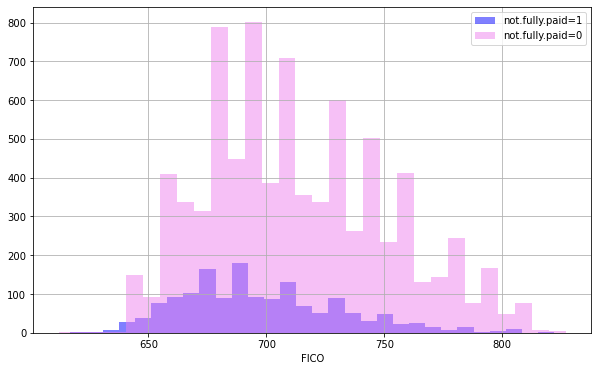

In [ ]:
# HISTOGRAM FOR NOTFULLY_PAID COLUMN
plt.figure(figsize=(10,6))
df2[df2['not_fully_paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df2[df2['not_fully_paid']==0]['fico'].hist(bins=30, alpha=0.5, color='violet', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

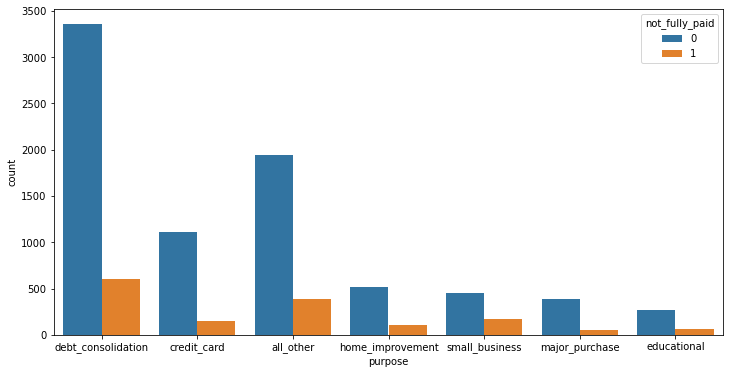

In [ ]:
# Creating a Boxplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df2, x='purpose', hue='not_fully_paid')

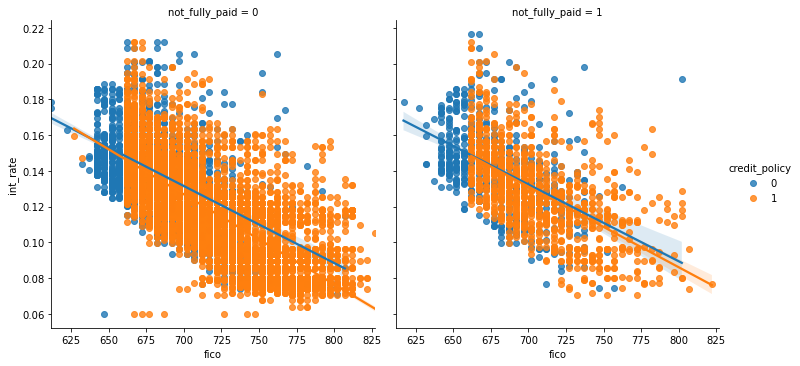

In [ ]:
#checking the trend between Notfullypaid and the interest rate

# plt.figure(figsize=(10,6))
# sns.jointplot(x='not_fully_paid', y='int_rate', data=df2)

sns.lmplot(x="fico", y="int_rate", col="not_fully_paid", data=df2, hue="credit_policy")

## 2.Find correlations between numerical features

Text(0.5, 1.0, 'Heatmap for Correlation Matrix')

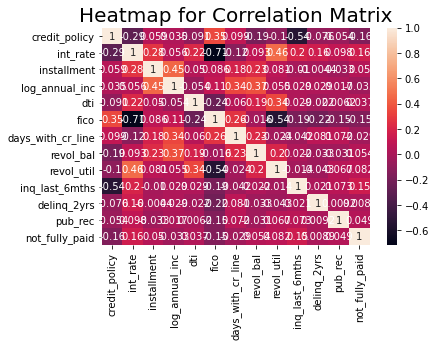

In [ ]:
# PLOTTIG CORRELATION MATRIX by using heatmap:
sns.heatmap(df2.corr(),annot=True)
plt.title('Heatmap for Correlation Matrix',fontsize=20)

# because of numbers,it is unvisible, but by colors we can understand, whoich cols are correlated:

# 1.3. Convert categorical features to dummies

In [ ]:
purpose_dummies = pd.get_dummies(df2.select_dtypes(include=[object]))

df2 = pd.concat([df2, purpose_dummies], axis=1)
df2.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,...,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Dropping unneeded column:
df2 = df2.drop(['purpose'], axis=1)

In [ ]:
df2.columns

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

## 1.4. Check for imbalance in the target variable

In [ ]:
# TERGET VALUES UNIQUE NUMBERS:
df2['not_fully_paid'].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

## 1.5. Split data into train and test with test size = 0.3 and random state = 2021.
+ Make sure imbalance ratio remains the same within train and test.

In [ ]:
# X and y arrays:
X = df2.drop("not_fully_paid", axis = 1) # All columns except this column.
y = df2["not_fully_paid"] # Only this column

# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y, random_state=2021) 
# 70% training and 30% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6704, 19)
(6704,)
(2874, 19)
(2874,)


## 1.6. Fit Decision Tree model with default settings. Find correspoding accuracy, f1 score, roc_auc on test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTree_model = DecisionTreeClassifier()
DTree_model.fit(X_train,y_train)

#checking accuracy of predicted values
DT_accur = round(DTree_model.score(X_test,y_test),3)
DT_F1_score =  round(f1_score(y_test, DTree_model.predict(X_test)),3)
DT_roc_auc =  round(roc_auc_score(y_test, DTree_model.predict(X_test)),3)

#Printing results
print('Accuracy on Test set', DT_accur)
print('f1_score on Test set',DT_F1_score)
print('Auc on Test set',DT_roc_auc)

Accuracy on Test set 0.746
f1_score on Test set 0.222
Auc on Test set 0.536


## 1.6.  Using GridSearchCV or RandomizedSearchCV (if you have large scope of parameters) tune the Decision Tree model. Find the best parameters. Find correspoding accuracy, f1 score, roc_auc on test set.

In [ ]:
random_grid = {'min_samples_leaf': [1, 2, 4, 6, 8],
          'min_samples_split': [None, 2, 5, 10, 12]}

In [ ]:
dtree_rf = DecisionTreeClassifier()

tree_random = RandomizedSearchCV(estimator=dtree_rf, 
                                param_distributions= random_grid, cv = 5)
tree_random.fit(X_train, y_train)

DT_R_accur = round(DTree_model.score(X_test,y_test),3)
DT_R_F1_score =  round(f1_score(y_test, tree_random.predict(X_test)),3)
DT_R_roc_auc =  round(roc_auc_score(y_test, tree_random.predict(X_test)),3)

#Printing results
print('Accuracy on Test set', DT_R_accur)
print('f1_score on Test set',DT_R_F1_score)
print('Auc on Test set',DT_R_roc_auc)

Accuracy on Test set 0.746
f1_score on Test set 0.178
Auc on Test set 0.526


## 1.7 Fit Bagging model with default settings. Find correspoding accuracy, f1 score, roc_auc on test set.


In [ ]:
from sklearn.ensemble import BaggingClassifier

Bag_model = BaggingClassifier()
Bag_model.fit(X_train,y_train)

#checking accuracy of predicted values
BAG_accur = round(Bag_model.score(X_test,y_test),3)
BAG_F1_score =  round(f1_score(y_test, Bag_model.predict(X_test)),3)
BAG_roc_auc =  round(roc_auc_score(y_test, Bag_model.predict(X_test)),3)

#Printing results
print('Accuracy on Test set', BAG_accur)
print('f1_score on Test set',BAG_F1_score)
print('Auc on Test set',BAG_roc_auc)

Accuracy on Test set 0.83
f1_score on Test set 0.083
Auc on Test set 0.514


## 1.7 Using GridSearchCV or RandomizedSearchCV (if you have large scope of parameters) tune the Bagging model. Find the best parameters. Find correspoding accuracy, f1 score, roc_auc on test set.

In [ ]:
random_grid = {'bootstrap': [True, False],
               'n_estimators': [50, 200, 400]}

In [ ]:
# These model is loading to LOOOOW:

# bag_random = BaggingClassifier()

# bag_random = RandomizedSearchCV(estimator=bag_random,param_distributions= random_grid, cv = 5)
# bag_random.fit(X_train, y_train)

# BAG_R_accur = round(bag_random.score(X_test,y_test),3)
# BAG_R_F1_score =  round(f1_score(y_test, bag_random.predict(X_test)),3)
# BAG_R_roc_auc =  round(roc_auc_score(y_test, bag_random.predict(X_test)),3)

#Printing results
# print('Accuracy on Test set', BAG_R_accur)
# print('f1_score on Test set',BAG_R_F1_score)
# print('Auc on Test set',BAG_R_roc_auc)

## 1.8. Fit Random Forest model with default settings. Find correspoding accuracy, f1 score, roc_auc on test set.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

#checking accuracy of predicted values
RF_accur = round(RF_model.score(X_test,y_test),3)
RF_F1_score =  round(f1_score(y_test, RF_model.predict(X_test)),3)
RF_roc_auc =  round(roc_auc_score(y_test, RF_model.predict(X_test)),3)

#Printing results
print('Accuracy on Test set', RF_accur)
print('f1_score on Test set',RF_F1_score)
print('Auc on Test set',RF_roc_auc)

Accuracy on Test set 0.839
f1_score on Test set 0.033
Auc on Test set 0.507


## 1.8. Using GridSearchCV or RandomizedSearchCV (if you have large scope of parameters) tune the Random Forest model. Find the best parameters. Find correspoding accuracy, f1 score, roc_auc on test set.


In [ ]:
prams = ({ 'max_features': [5,10] ,'min_samples_leaf': [30,50] })

In [ ]:
RF_random = RandomForestClassifier()

RF_random = RandomizedSearchCV(estimator=prams, 
                                param_distributions= random_grid, cv = 5)
RF_random.fit(X_train, y_train)

BAG_R_accur = round(bag_random.score(X_test,y_test),3)
BAG_R_F1_score =  round(f1_score(y_test, RF_random.predict(X_test)),3)
BAG_R_roc_auc =  round(roc_auc_score(y_test, RF_random.predict(X_test)),3)

#Printing results
print('Accuracy on Test set', BAG_R_accur)
print('f1_score on Test set',BAG_R_F1_score)
print('Auc on Test set',BAG_R_roc_auc)
# low loading

# DATAFRAME

In [ ]:
# collecting into 1 Dataframe
all_accur = [DT_accur,BAG_accur, RF_accur]
all_f1 = [DT_F1_score,BAG_F1_score, RF_F1_score ]

all_roc = [DT_roc_auc, BAG_roc_auc,RF_roc_auc]
#columns:
columns={'Accuracy':all_accur,'F1':all_f1,'roc':all_roc}

models=['Decision', 'BAGGING ', 'FOREST']
result = pd.DataFrame(data = columns,index = models)
result

,Accuracy,F1,roc
Decision,0.746,0.222,0.536
BAGGING,0.830,0.083,0.514
FOREST,0.839,0.033,0.507


+ fOREST IS BEST MODEL AMONG OTHERS

---

### Evaluotion form (Keep it)

| Questian | Mark  | Comnent   
|:-------:|:--------:|:----------------------
| 1       |   50/50    | 
| 2       |   50/50    | 
|**Total**|**100/100**  | 
